In [4]:
from figures_analysis.readJSONtoDict import read_folder_of_folders_to_one_list

In [5]:
path = "/Users/dan/Desktop/FinalGeneratedData"
total_list = read_folder_of_folders_to_one_list(path)

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [24]:
processed_data = []
for data_dict in total_list:
    new_data_dict = data_dict.copy()
    if "Delays" in new_data_dict:
        del new_data_dict["Delays"]
    processed_data.append(new_data_dict)
df = pd.DataFrame(processed_data)
np_matrix = df.drop('Preprocessing Runtime', axis=1).to_numpy()

In [25]:
len(processed_data)

531

In [55]:
X = df.drop(['Preprocessing Runtime', 'Average delay', 'Number of Connected Components', 'Number of Minimal Hitting Sets'], axis=1)
feature_names = df.drop(['Preprocessing Runtime', 'Average delay', 'Number of Connected Components', 'Number of Minimal Hitting Sets'], axis=1).columns.tolist()

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


y = df['Preprocessing Runtime'].values  # Target variable

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=421
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance (Rooted Mean Squared Error)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("XGBoost Model Performance:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE:  {test_rmse:.4f}")

XGBoost Model Performance:
Training RMSE: 47.9492
Testing RMSE:  80.0918


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

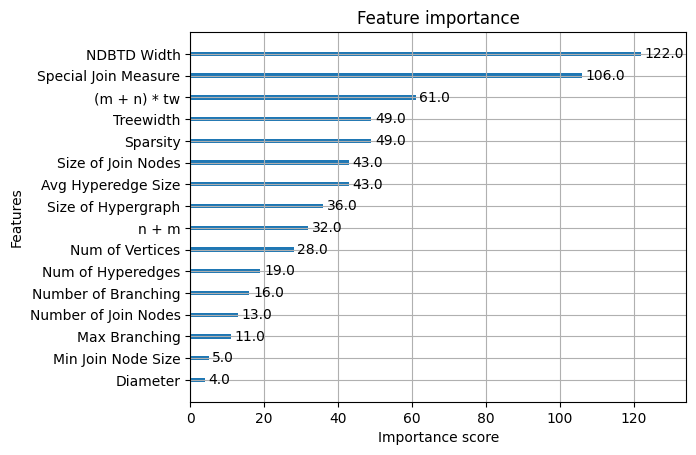

In [61]:
xgb.plot_importance(model)

In [80]:
feature_names

['Num of Vertices',
 'Num of Hyperedges',
 'n + m',
 'Max Hyperedge Size',
 'Min Hyperedge Size',
 'Avg Hyperedge Size',
 'Size of Hypergraph',
 'Number of Connected Components',
 'Diameter',
 'Sparsity',
 'Treewidth',
 '(m + n) * tw',
 'Number of Join Nodes',
 'Size of Join Nodes',
 'Special Join Measure',
 'Max Join Node Size',
 'Min Join Node Size',
 'Number of Branching',
 'Max Branching',
 'Real Effective Width',
 'Number of Minimal Hitting Sets',
 'Average delay']

In [66]:
model = LinearRegression()
model.fit(X_train, y_train)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance (Rooted Mean Squared Error)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Linear Regression Model Performance:")
print(f"Training MSE: {train_rmse:.4f}")
print(f"Testing MSE:  {test_rmse:.4f}")

Linear Regression Model Performance:
Training MSE: 167.5530
Testing MSE:  183.4047
